# Librerias

In [2]:
import numpy as np
import pandas as pd
import pylinreglib as lr

# Manual de la libreria Linreg

### Importar datos

In [3]:
df = pd.read_csv("students_performance.csv", header=0)

### Crear modelo

In [5]:
full_model = lr.lrm(df, 0)
simple_model = lr.lrm(df, 0, 3)
r3_model = lr.lrm(df, 0, [2, 3])
full_model = lr.lrm(df, "Performance")
simple_model = lr.lrm(df, "Performance", "Speed")
r3_model = lr.lrm(df, "Performance", ["Skills", "Speed"])

### Estadísticos

In [6]:
sse = full_model.SSE()
var = full_model.var()
ssr = full_model.SSR()
msr = full_model.MSR()
mse = full_model.MSE()
sst = full_model.SST()
r2 = full_model.R2()
r2adj = full_model.R2_adj()
pressp = full_model.PRESSp()
print(full_model.summary())

                             Valor
Estadístico                       
SSR (Regresión)       2132324.3880
SSE (Error)             51426.6178
SST (Total)           2183751.0057
MSR (Media Regresión)  710774.7960
MSE (Media Error)         103.6827
R²                          0.9765
R² ajustado                 0.9763
PRESSp                  52249.6557
Cp                          2.0000


In [7]:
beta_var_matrix = full_model.coefficients_var_matrix()
betas_var = full_model.coefficients_var()
y_hat = simple_model.hat_matrix()

### Inferencias

In [8]:
simple_model.significance_test()
full_model.coefficients_confidence_intervals()
full_model.coefficients_hipotesis_test(values=[70, 0, 2, 3])

[True, False, False, True]

### Nuevas observaciones

In [ ]:
new_obs = full_model.predict_obs([[3,3,3], [50, 50, 50], [4, 4, 4]])
print(*new_obs)
print(f"intervalo de prediccion: \n{np.round(full_model.obs_prediction_intervals([[3,3,3], [50,50,50]]), 2)}")
print(f"intervalo de confianza: \n{np.round(full_model.obs_confidence_intervals([[3,3,3], [50,50,50]]), 2)}")

### Errores

In [10]:
stan = full_model.standardized_residuals()
stud = full_model.studentized_residuals()
VP, normal = full_model.residuals_normality_test()
print(VP, normal)

0.18770143106178072 True


### Anomalias

In [11]:
l1 = full_model.get_leverage_points()
l2 = full_model.get_influential_obs()
l3 = full_model.get_outliers_std()
l4 = full_model.get_outliers_stud()
print(*l1)
print(*l2)
print(*l3)
print(*l4)
print(f"dimensiones: {full_model.X.shape}")
full_model.remove_anomalies(inplace=True)
print(f"dimensiones: {full_model.X.shape}")

74 101 193 273 310
15 44 112 153 166 172 218 221 235 246 288 293 315 361
15 166 218 315
15 166 218 315
dimensiones: (500, 3)
dimensiones: (481, 3)


### Alterar modelo

In [12]:
full_model_filtered = full_model.only_sig_vars()
full_model_std = full_model_filtered.standardize()
r3_model_std = r3_model.standardize()
print(full_model_filtered == full_model)
print(r3_model_std == r3_model)
print(r3_model.coefficients)
print(r3_model_std.coefficients)

print(simple_model.coefficients)
simple_model_std = simple_model.standardize()
print(simple_model_std.coefficients)

False
False
[114.65875935   1.86898292   3.02144376]
[0.62145658 0.74693191]
[234.17056121   2.98499339]
[0.737921]


### Gráficos :)

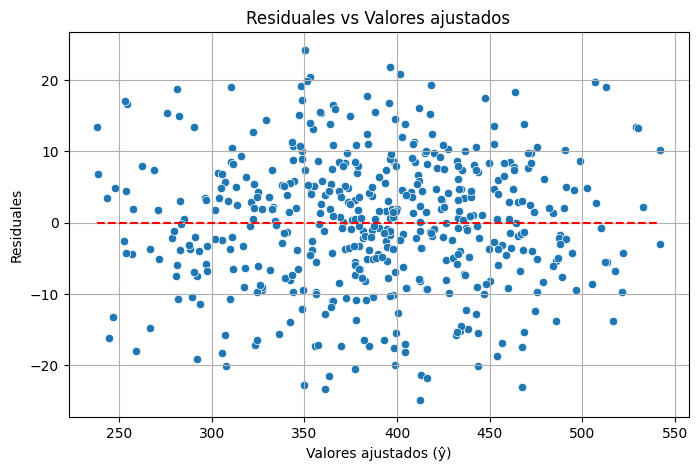

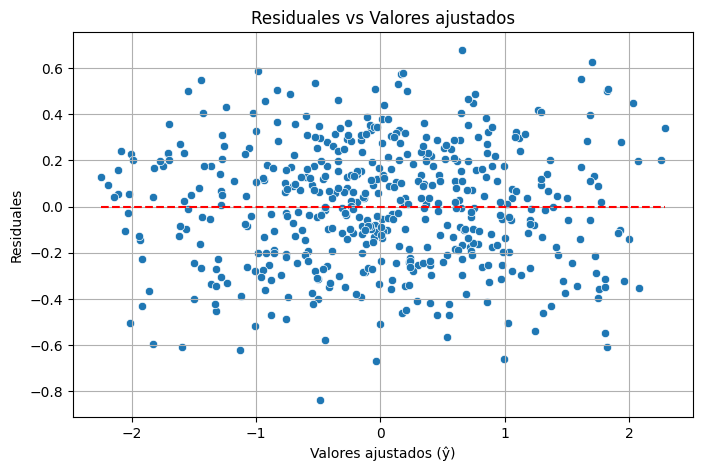

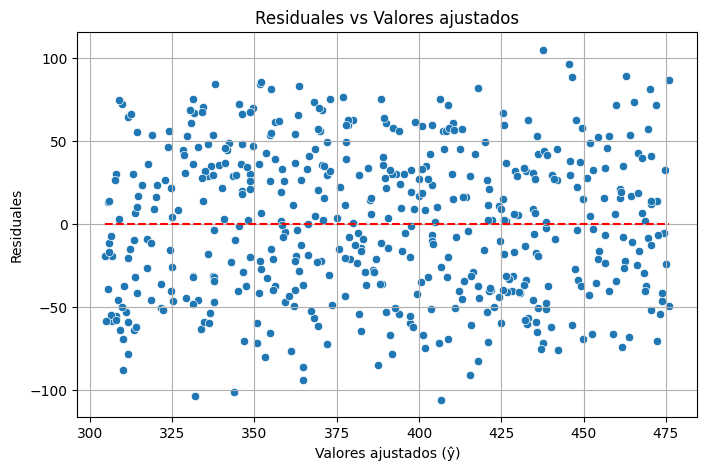

El modelo tiene 3 predictores. Solo funciona para 1 o 2 predictores


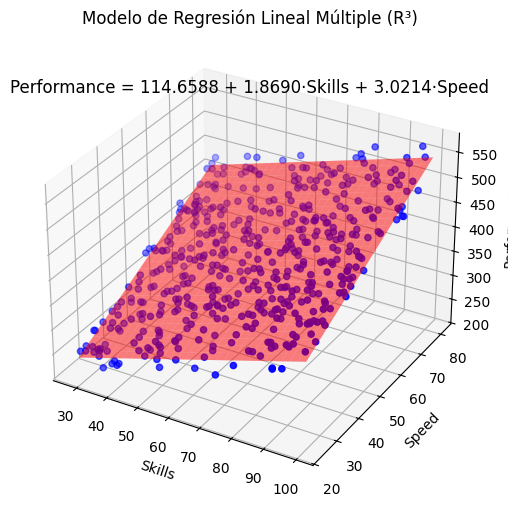

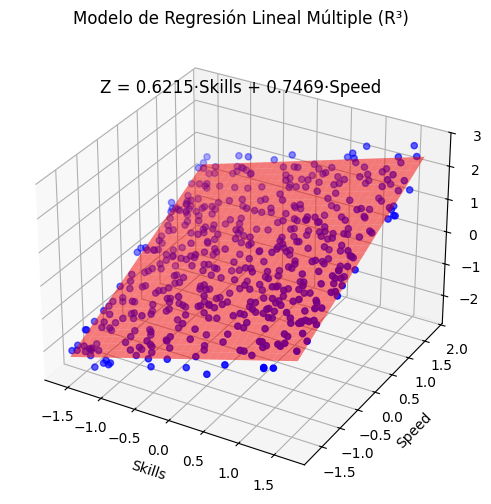

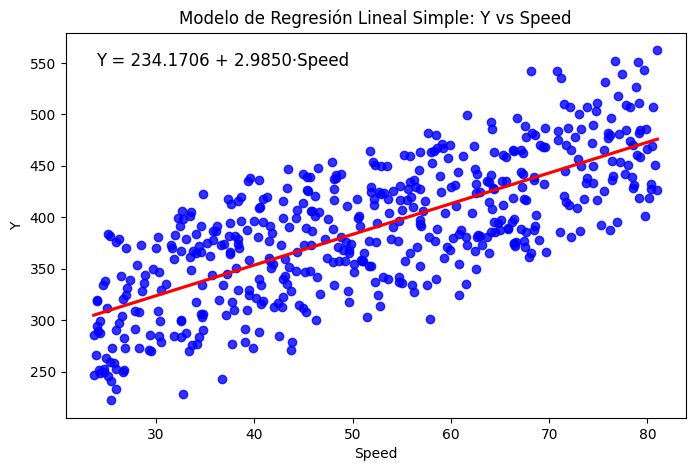

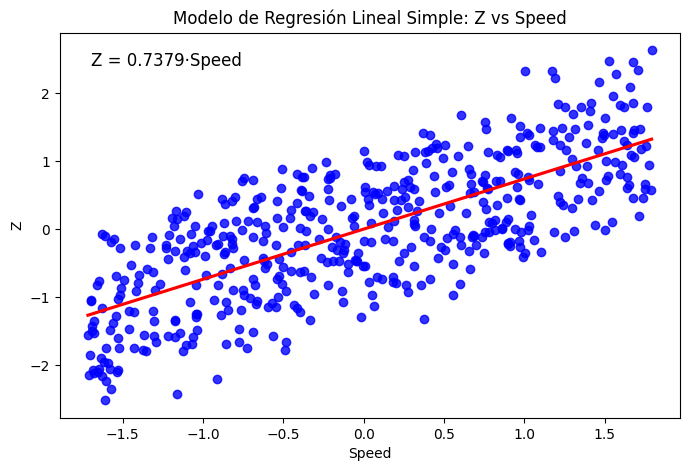

In [13]:
full_model.plot_residuals_vs_fitted()
r3_model_std.plot_residuals_vs_fitted()
simple_model.plot_residuals_vs_fitted()
full_model.plot_regression("Performance")
r3_model.plot_regression("Performance")
r3_model_std.plot_regression("Z")
simple_model.plot_regression("Y")
simple_model_std.plot_regression()

## Multicolinealidad

In [14]:
vifs = full_model.VIFs()
cond_num = full_model_std.condition_number()
FM_mc = full_model.detect_multicollinearity()
r2j = full_model.R2_j()
df_mc = pd.DataFrame({
    "Predictor": full_model.X.columns,
    "VIF_j": vifs,
    "R2_j": r2j
})
df_mc.index.name = "J"
df_mc.index = df_mc.index + 1
print(f"Es {FM_mc} que el modelo tiene multicolinealidad, dado que el número de condición es {cond_num:.2f}")
df_mc

Es False que el modelo tiene multicolinealidad, dado que el número de condición es 1.11


,Predictor,VIF_j,R2_j
J,,,
1,Strength,1.0023,0.0023
2,Skills,1.0013,0.0013
3,Speed,1.0023,0.0023


## Selección de Variables

### Método de todas las regresiones posibles

In [15]:
full_model.all_reg_table()

,predictors,R2_adj,MSE,PRESSp,Cp
0,"(Strength, Skills, Speed)",0.9791,86.6229,41980.7621,4.0000
1,"(Skills, Speed)",0.9327,278.4152,134774.8766,1061.3433
2,"(Strength, Speed)",0.5765,1752.7015,848382.8543,9196.7119
3,"(Speed,)",0.5380,1912.1195,923505.1626,10096.4826
4,"(Strength, Skills)",0.4031,2470.5553,1195696.0244,13157.9544
5,"(Skills,)",0.3704,2605.9587,1258728.3816,13933.2178
6,"(Strength,)",0.0264,4029.8630,1946859.9395,21807.0079


In [16]:
full_model_std.all_reg_table()

,predictors,R2_adj,MSE,PRESSp,Cp
0,"(Strength, Skills, Speed)",0.9791,0.0209,10.1002,5.0000
1,"(Skills, Speed)",0.9329,0.0671,32.4257,1064.5641
2,"(Strength, Speed)",0.5774,0.4226,204.1140,9216.9880
3,"(Speed,)",0.5390,0.4610,222.1898,10118.6493
4,"(Strength, Skills)",0.4044,0.5956,287.6748,13186.5350
5,"(Skills,)",0.3717,0.6283,302.8425,13963.4279
6,"(Strength,)",0.0284,0.9716,468.4026,21853.7249


### Selección automática
#### Forward

In [17]:
full_model_std.forward_selection()

,step,predictors,MSE,R2_adj,PRESSp,Cp
0,1,"(Speed,)",0.4610,0.5390,222.1898,10118.6493
1,2,"(Speed, Skills)",0.0671,0.9329,32.4257,1064.5641
2,3,"(Speed, Skills, Strength)",0.0209,0.9791,10.1002,5.0000


In [18]:
full_model_std.backward_elimination()

,step,predictors,MSE,R2_adj,PRESSp,Cp
0,0,"(Strength, Skills, Speed)",0.0209,0.9791,10.1002,5.0000


In [19]:
full_model_std.stepwise_selection()

,step,predictors,MSE,R2_adj,PRESSp,Cp
0,1,"(Speed,)",0.4610,0.5390,222.1898,10118.6493
1,2,"(Speed, Skills)",0.0671,0.9329,32.4257,1064.5641
2,3,"(Speed, Skills, Strength)",0.0209,0.9791,10.1002,5.0000


## Categoric LRM

In [20]:
df_prueba = pd.DataFrame({
    'W': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Y': [10, 15, 20, 11, 14, 19]
})

In [21]:
modelo = lr.clrm(data=df_prueba, response_col='Y', predictor_col='W', how="no_intercept")
print("X_matrix:\n", modelo.X_matrix)
print("Coefficients:\n", modelo.coefficients)
print("Predicted:\n", modelo.predicted())
print("Residuals:\n", modelo.residuals)
print(modelo.summary())

X_matrix:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]]
Coefficients:
 [10.5 14.5 19.5]
Predicted:
 [10.5 14.5 19.5 10.5 14.5 19.5]
Residuals:
 0   -0.5000
1    0.5000
2    0.5000
3    0.5000
4   -0.5000
5   -0.5000
Name: Y, dtype: float64
                        Valor
Estadístico                  
SSR (Regresión)       81.3333
SSE (Error)            1.5000
SST (Total)           82.8333
MSR (Media Regresión) 40.6667
MSE (Media Error)      0.5000
R²                     0.9819
R² ajustado            0.9698
PRESSp                 6.0000
Cp                     1.0000


In [22]:
print(modelo.coefficients_confidence_intervals())
print(modelo.coefficients_hipotesis_test([10, 14, 19]))
VP, normal = modelo.residuals_normality_test()
print(VP, normal)

[(8.908776847357869, 12.091223152642131), (12.908776847357869, 16.091223152642133), (17.908776847357867, 21.091223152642133)]
[True, True, True]
0.004039328512451689 False


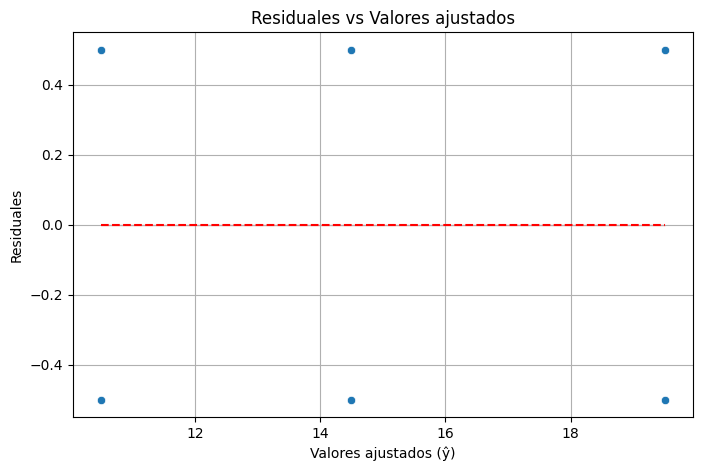

In [23]:
modelo.plot_residuals_vs_fitted()

In [24]:
print(modelo.obs_confidence_intervals(["A", "B", "C"]))
print(modelo.obs_prediction_intervals(["A", "B", "C"]))
modelo.remove_anomalies(inplace=True)

[(8.908776847357869, 10.5, 12.091223152642131), (12.908776847357869, 14.5, 16.091223152642133), (17.908776847357867, 19.5, 21.091223152642133)]
[(7.743920653443901, 10.5, 13.256079346556099), (11.743920653443901, 14.5, 17.2560793465561), (16.7439206534439, 19.5, 22.2560793465561)]


c:\Users\yepestoro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pylinreglib\BaseLRM.py:282: UserWarning: La condición para revisar puntos de alto apalancamiento (2p/n < 1) no se cumple.
  warn("La condición para revisar puntos de alto apalancamiento (2p/n < 1) no se cumple.", UserWarning)


In [25]:
n = 30
data = pd.DataFrame({
    "Genero": np.random.choice(["Hombre", "Mujer", "Loco"], size=n),
    "Edad": np.random.randint(18, 50, size=n),
    "Icfes": np.random.randint(100, 400, size=n),
    "Horas_estudio": np.random.uniform(1, 50, size=n).round(2),
})
data

,Genero,Edad,Icfes,Horas_estudio
0,Loco,30,360,21.0300
1,Loco,40,139,30.6000
2,Loco,22,199,32.2400
3,Loco,22,199,30.2100
4,Loco,26,270,14.5500
5,Hombre,48,137,36.4500
6,Loco,36,157,49.7700
7,Mujer,24,152,33.9300
8,Hombre,40,338,2.0800
9,Loco,18,131,45.3600


In [26]:
model = lr.mlrm(data, "Horas_estudio", "Genero", interaction=True)

In [27]:
model.get_coef_df()

,Variable,Beta
0,Intercepto,85.3197
1,Edad,-0.6323
2,Icfes,-0.1545
3,Loco,-36.2248
4,Mujer,-77.3988
5,Edad*Loco,0.5550
6,Edad*Mujer,0.8431
7,Icfes*Loco,0.0699
8,Icfes*Mujer,0.2086


Categoría: Loco
Coeficientes: [49.09485331 -0.07730925 -0.08462533]

Categoría: Mujer
Coeficientes: [7.9209157  0.21077451 0.05411497]

Categoría: Hombre
Coeficientes: [85.31970127 -0.63232566 -0.154484  ]



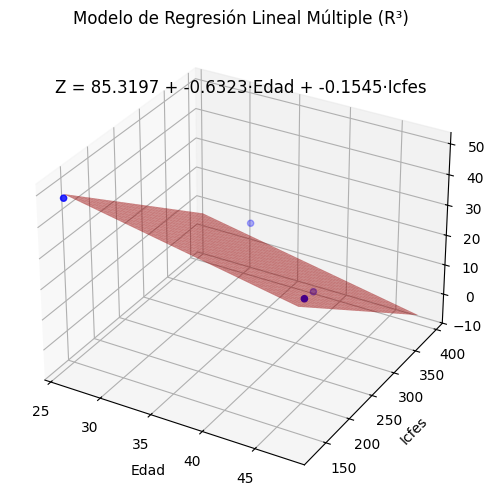

In [28]:
dicc = model.models_by_category()
for categoria, modelo in dicc.items():
    print(f"Categoría: {categoria}")
    print("Coeficientes:", modelo.coefficients)
    print()
modelo.plot_regression()